### DATA CLEANING & PREPARATION

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
from keras.models import Sequential    # The model class is Sequentially arranged 
from keras.layers import Dense, Dropout  # Dense indicates fully connected networks
from keras.losses import mean_squared_error  # loss 
from keras.optimizers import SGD # Evaluation metric
from keras.metrics import mean_squared_error         # Evaluation metric
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("AI2010-2014Fuel_Consumption Ratings5CYCLE2.csv")
df.head()

,MODEL (YEAR),MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION CITY,FUEL CONSUMPTION HWY,FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS
0,2010,ACURA,CSX,COMPACT,2.0,4,AS5,X,10.9,7.8,9.5,30,219
1,2010,ACURA,CSX,COMPACT,2.0,4,M5,X,10.0,7.6,8.9,32,205
2,2010,ACURA,CSX,COMPACT,2.0,4,M6,Z,11.6,8.1,10.0,28,230
3,2010,ACURA,MDX AWD,SUV,3.7,6,AS6,Z,14.8,11.3,13.2,21,304
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4,AS5,Z,13.2,10.3,11.9,24,274


In [3]:
df.isnull().sum()

MODEL (YEAR)                        0
MAKE                                0
MODEL                               0
VEHICLE CLASS                       0
ENGINE SIZE                         0
CYLINDERS                           0
TRANSMISSION                        0
FUEL                                0
FUEL CONSUMPTION CITY               0
FUEL CONSUMPTION HWY                0
FUEL CONSUMPTION COMB (L/100 km)    0
FUEL CONSUMPTION COMB (mpg)         0
CO2 EMISSIONS                       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   MODEL (YEAR)                      5359 non-null   int64  
 1   MAKE                              5359 non-null   object 
 2   MODEL                             5359 non-null   object 
 3   VEHICLE CLASS                     5359 non-null   object 
 4   ENGINE SIZE                       5359 non-null   float64
 5   CYLINDERS                         5359 non-null   int64  
 6   TRANSMISSION                      5359 non-null   object 
 7   FUEL                              5359 non-null   object 
 8   FUEL CONSUMPTION CITY             5359 non-null   float64
 9   FUEL CONSUMPTION HWY              5359 non-null   float64
 10  FUEL CONSUMPTION COMB (L/100 km)  5359 non-null   float64
 11  FUEL CONSUMPTION COMB (mpg)       5359 non-null   int64  
 12  CO2 EM

In [5]:
df.columns

Index(['MODEL (YEAR)', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE',
       'CYLINDERS', 'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION CITY',
       'FUEL CONSUMPTION HWY', 'FUEL CONSUMPTION COMB (L/100 km)',
       'FUEL CONSUMPTION COMB (mpg)', 'CO2 EMISSIONS '],
      dtype='object')

In [6]:
df.columns = ['model_year', 'make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city', 'fuel_consumption_hwy',
       'fuel_consumption_comb', 'fuel_consumption_comb_mpg', 'co2_emissions']

In [7]:
df = df.dropna()

In [8]:
column_type = {'model_year': int,'fuel_consumption_city': float,'fuel_consumption_hwy': float,'fuel_consumption_comb': float,'fuel_consumption_comb_mpg': float,'co2_emissions': int,'engine_size':float,'cylinders': float}
df = df.astype(column_type)

<Figure size 1280x960 with 0 Axes>

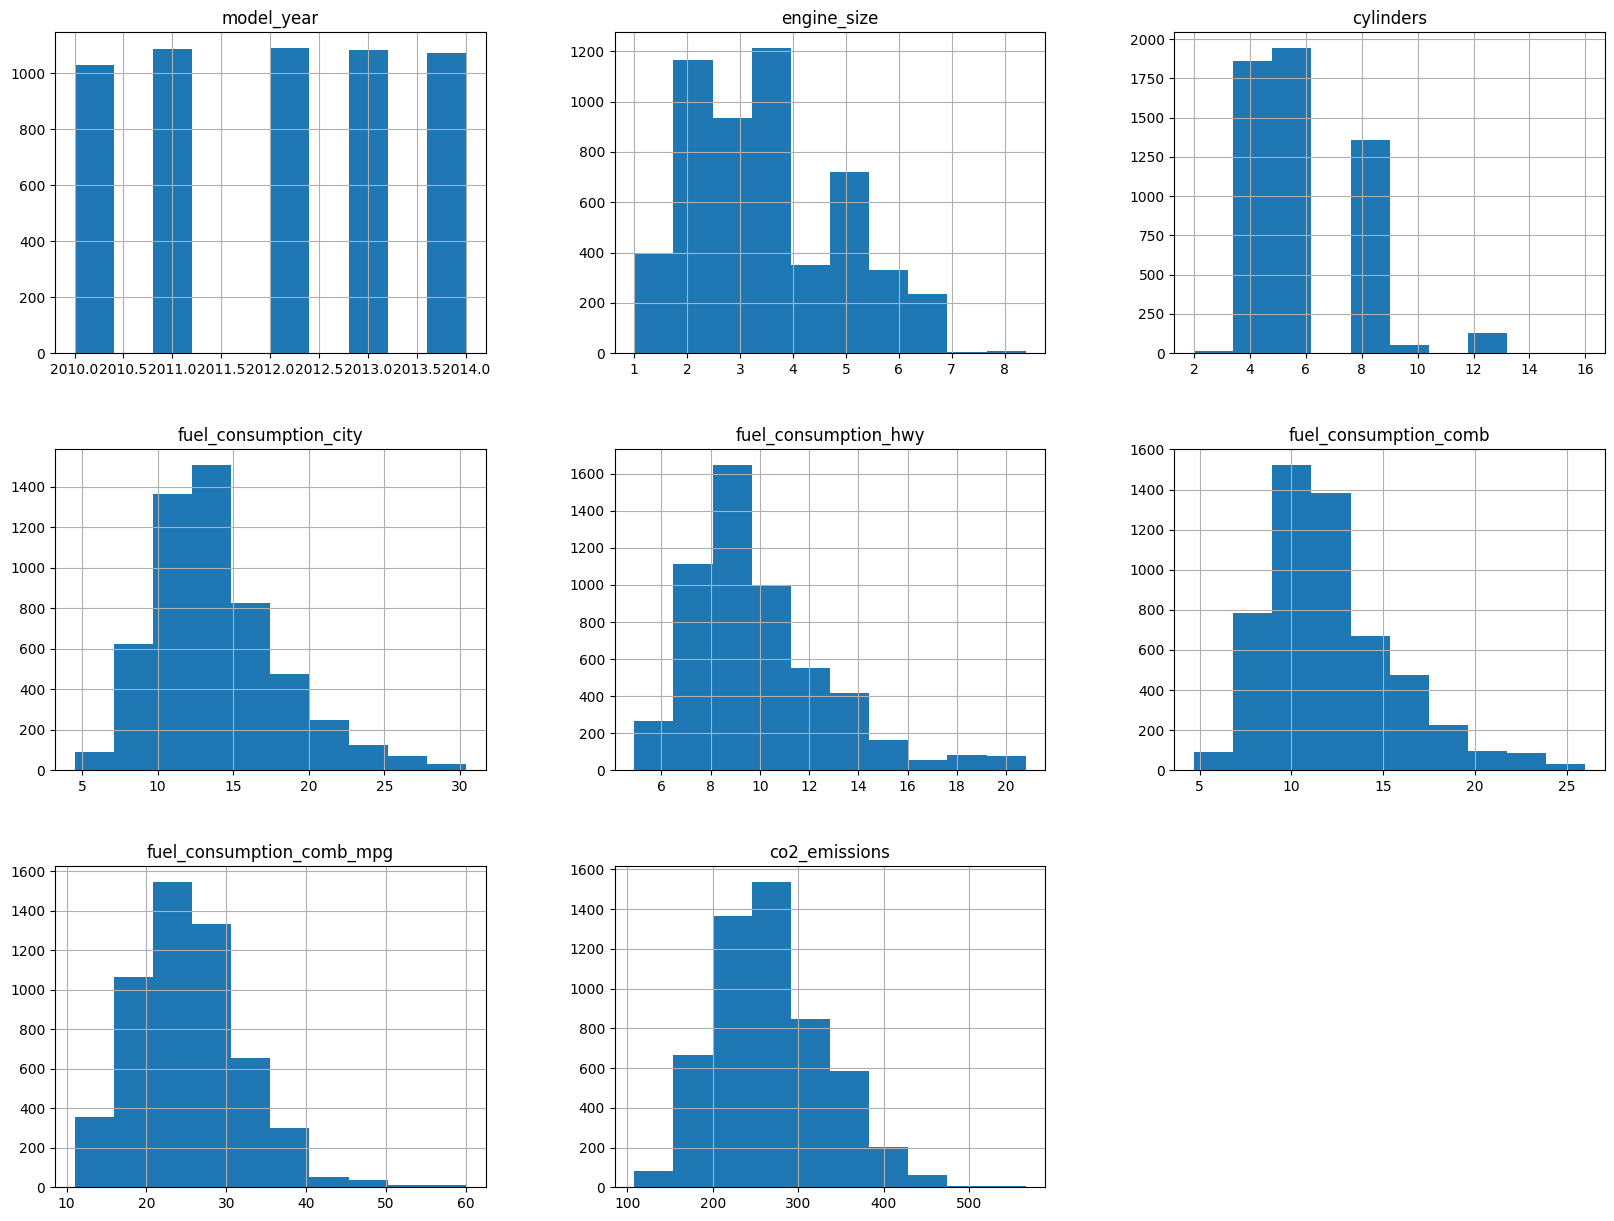

In [9]:
plt.figure(dpi=200)
df.hist(figsize = (20,15))
plt.show()

The 'Cylinders' and 'Model_year' attributes are discrete.

In [10]:
df.describe()

,model_year,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
count,5359.000000,5359.000000,5359.000000,5359.000000,5359.000000,5359.000000,5359.000000,5359.000000
mean,2012.014742,3.491901,5.962120,13.902650,9.932208,12.116328,25.168875,267.660198
std,1.404536,1.390957,1.872838,4.162894,2.807196,3.524127,6.956407,64.317040
min,2010.000000,1.000000,2.000000,4.500000,4.900000,4.700000,11.000000,108.000000
25%,2011.000000,2.400000,4.000000,11.000000,8.000000,9.700000,20.000000,221.000000
50%,2012.000000,3.500000,6.000000,13.200000,9.300000,11.400000,25.000000,260.000000
75%,2013.000000,4.600000,8.000000,16.000000,11.200000,13.900000,29.000000,305.000000
max,2014.000000,8.400000,16.000000,30.400000,20.800000,26.000000,60.000000,566.000000


In [11]:
numeric = df.select_dtypes(exclude = 'object')
objects = df.select_dtypes(include = 'object')

In [12]:
numeric.head()

,model_year,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,2010,2.0,4.0,10.9,7.8,9.5,30.0,219
1,2010,2.0,4.0,10.0,7.6,8.9,32.0,205
2,2010,2.0,4.0,11.6,8.1,10.0,28.0,230
3,2010,3.7,6.0,14.8,11.3,13.2,21.0,304
4,2010,2.3,4.0,13.2,10.3,11.9,24.0,274


In [13]:
objects.head()

,make,model,vehicle_class,transmission,fuel_type
0,ACURA,CSX,COMPACT,AS5,X
1,ACURA,CSX,COMPACT,M5,X
2,ACURA,CSX,COMPACT,M6,Z
3,ACURA,MDX AWD,SUV,AS6,Z
4,ACURA,RDX AWD TURBO,SUV,AS5,Z


In [14]:
df['fuel_type'].unique()

array(['X', 'Z', 'D', 'E'], dtype=object)

<AxesSubplot: xlabel='fuel_type', ylabel='count'>

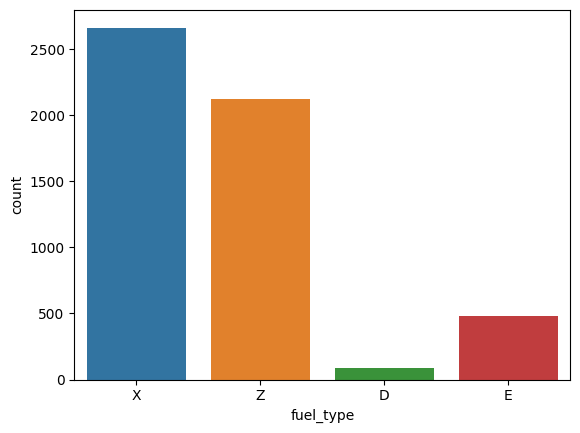

In [15]:
sns.countplot(data=df, x='fuel_type')

In [16]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc_data = enc.fit_transform(objects['fuel_type'])
df_enc = pd.DataFrame(enc_data, columns=['fuel_type'])
new_numeric_df = pd.concat([numeric, df_enc], axis=1)
new_numeric_df.dropna(inplace=True)


<AxesSubplot: >

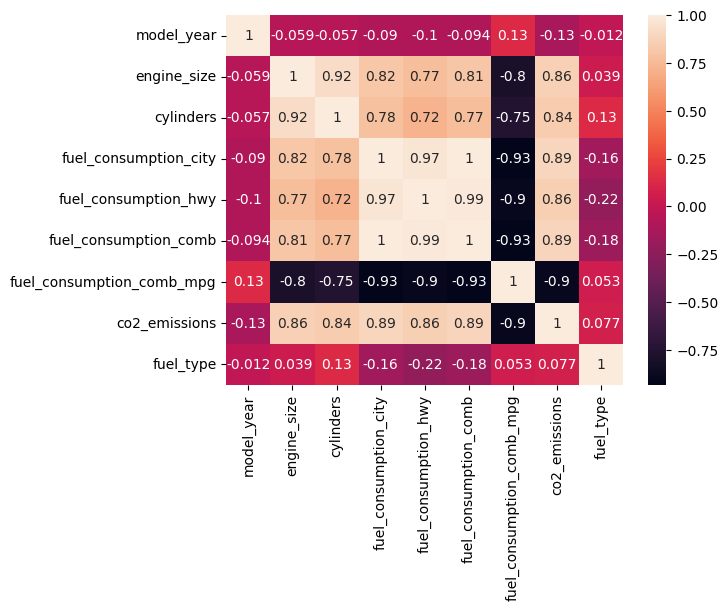

In [17]:
sns.heatmap(new_numeric_df.corr(), annot=True)

<AxesSubplot: >

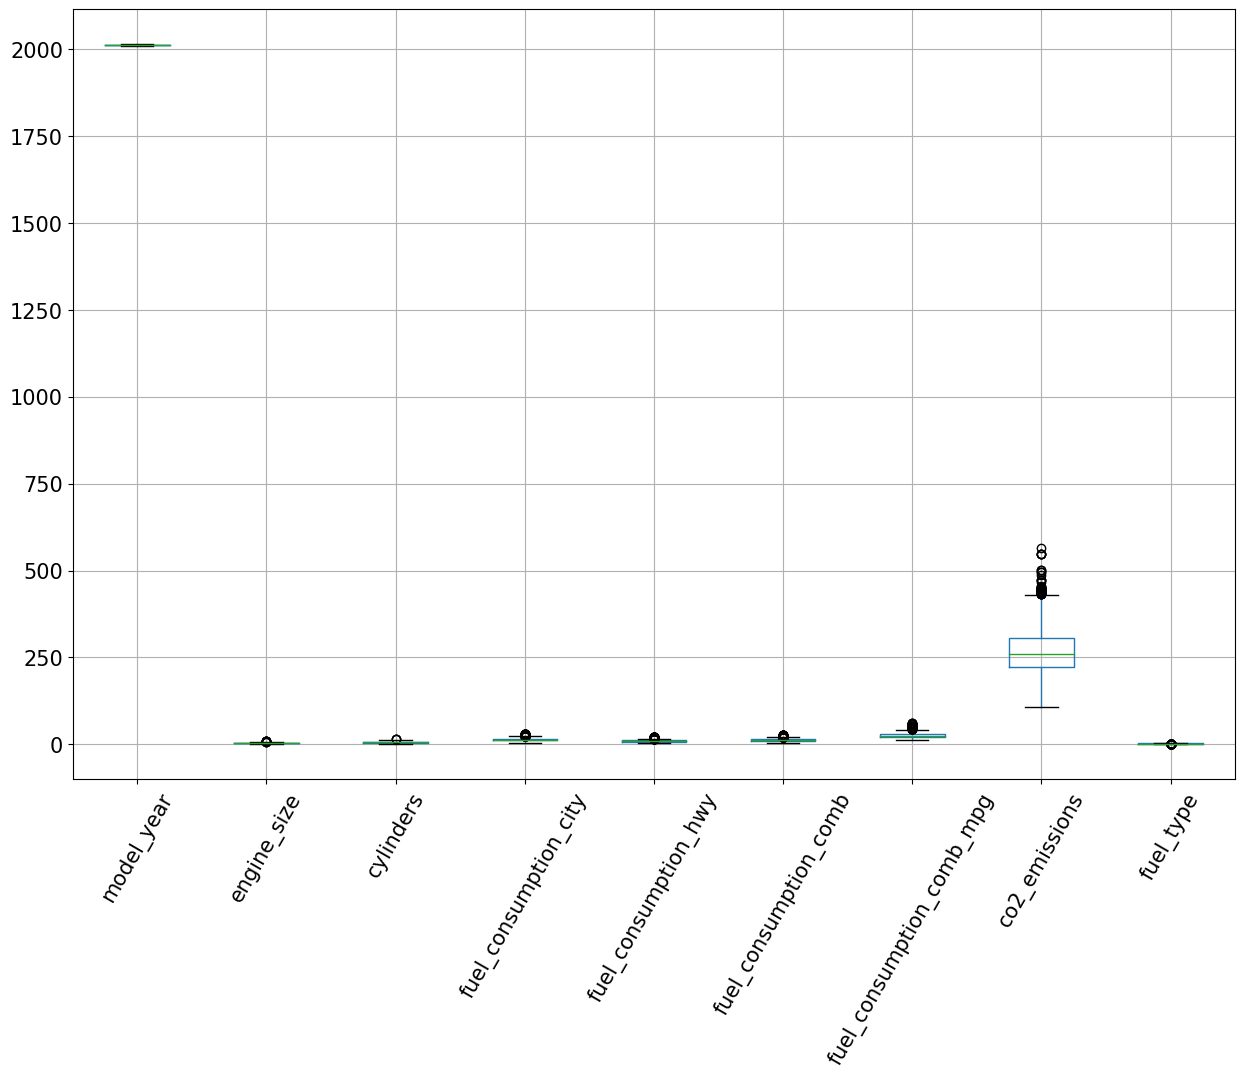

In [18]:
new_numeric_df.boxplot(figsize = (15,10), fontsize = 15, rot = 60)

### BUILDING THE MODEL

In [19]:
from sklearn.model_selection import train_test_split

X = new_numeric_df.drop('co2_emissions', axis=1)
y = new_numeric_df['co2_emissions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X = X_train
y= y_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=21)

###### Normalizing the datasets

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_Xtrain = scaler.fit_transform(X_train)
scaled_Xtest = scaler.transform(X_test)
scaled_Xval = scaler.transform(X_val)
Xtrain_df = pd.DataFrame(scaled_Xtrain, columns = X_train.columns)
Xtest_df = pd.DataFrame(scaled_Xtest, columns = X_test.columns)
Xval_df = pd.DataFrame(scaled_Xval, columns = X_val.columns)

###### Simple Linear Regression 

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
cont_variables = Xtrain_df[['engine_size','fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb', 'fuel_consumption_comb_mpg']]
for col in cont_variables.columns:
    lm = LinearRegression()
    col_xtrain = Xtrain_df[col].to_numpy().reshape(-1,1)
    col_xval = Xval_df[col].to_numpy().reshape(-1,1)
    lm.fit(col_xtrain, y_train)
    y_pred = lm.predict(col_xval)
    r2 = r2_score(y_val, y_pred)
    mean_abs_err = mean_absolute_error(y_val, y_pred)
    mean_sqr_err = mean_squared_error(y_val, y_pred)
    root_mean_sqr = np.sqrt(mean_sqr_err)
    print(f"{col}")
    print(f"Mean Absolute Error: {mean_abs_err:.2f}")
    print(f"Root Mean Square Error: {root_mean_sqr:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print('\n')

engine_size
Mean Absolute Error: 24.51
Root Mean Square Error: 32.70
R2 Score: 0.73


fuel_consumption_city
Mean Absolute Error: 20.17
Root Mean Square Error: 28.85
R2 Score: 0.79


fuel_consumption_hwy
Mean Absolute Error: 24.53
Root Mean Square Error: 33.01
R2 Score: 0.72


fuel_consumption_comb
Mean Absolute Error: 20.92
Root Mean Square Error: 29.70
R2 Score: 0.77


fuel_consumption_comb_mpg
Mean Absolute Error: 17.58
Root Mean Square Error: 25.87
R2 Score: 0.83




USING ALL VARIABLES TO PREDICT CO2 EMISSIONS

In [22]:
lm = LinearRegression()
lm.fit(Xtrain_df, y_train)
y_pred = lm.predict(Xval_df)
r2 = r2_score(y_val, y_pred)
mean_abs_err = mean_absolute_error(y_val, y_pred)
mean_sqr_err = mean_squared_error(y_val, y_pred)
root_mean_sqr = np.sqrt(mean_sqr_err)

In [23]:

print(f"R2 Score: {r2:.2f}")
print(f"Mean Absolute Error: {mean_abs_err:.2f}")
print(f"Root Mean Square Error: {root_mean_sqr:.2f}")

R2 Score: 0.88
Mean Absolute Error: 14.98
Root Mean Square Error: 21.42


In [24]:

sub_Xtrain = Xtrain_df[['cylinders', 'fuel_consumption_comb_mpg','engine_size']]
sub_Xtest = Xtest_df[['cylinders', 'fuel_consumption_comb_mpg', 'engine_size']]
sub_Xval = Xval_df[['cylinders', 'fuel_consumption_comb_mpg', 'engine_size']]

lm = LinearRegression()
lm.fit(sub_Xtrain, y_train)
y_pred = lm.predict(sub_Xval)

r2 = r2_score(y_val, y_pred)
mean_abs_err = mean_absolute_error(y_val, y_pred)
mean_sqr_err = mean_squared_error(y_val, y_pred)
root_mean_sqr = np.sqrt(mean_sqr_err)

print(f"Results when 'cylinders', 'engine_size', and 'fuel_consumption_comb_mpg' were used:")
print(f"R2 Score: {r2:.2f}")
print(f"Mean Absolute Error: {mean_abs_err:.2f}")
print(f"Root Mean Square Error: {root_mean_sqr:.2f}")

Results when 'cylinders', 'engine_size', and 'fuel_consumption_comb_mpg' were used:
R2 Score: 0.87
Mean Absolute Error: 15.62
Root Mean Square Error: 22.27


In [25]:

sub_Xtrain = Xtrain_df[['engine_size', 'fuel_consumption_comb_mpg']]
sub_Xtest = Xtest_df[['engine_size', 'fuel_consumption_comb_mpg']]
sub_Xval = Xval_df[['engine_size', 'fuel_consumption_comb_mpg']]

lm = LinearRegression()
lm.fit(sub_Xtrain, y_train)
y_pred = lm.predict(sub_Xval)

r2 = r2_score(y_val, y_pred)
mean_abs_err = mean_absolute_error(y_val, y_pred)
mean_sqr_err = mean_squared_error(y_val, y_pred)
root_mean_sqr = np.sqrt(mean_sqr_err)

print(f'engine_size and fuel_consumption_comb_mpg')
print(f"R2 Score: {r2:.2f}")
print(f"Mean Absolute Error: {mean_abs_err:.2f}")
print(f"Root Mean Square Error: {root_mean_sqr:.2f}")

engine_size and fuel_consumption_comb_mpg
R2 Score: 0.86
Mean Absolute Error: 16.20
Root Mean Square Error: 23.38


In [26]:
# Training and validating the model. 
sub_Xtrain = Xtrain_df[['cylinders', 'fuel_consumption_comb_mpg']]
sub_Xtest = Xtest_df[['cylinders', 'fuel_consumption_comb_mpg']]
sub_Xval = Xval_df[['cylinders', 'fuel_consumption_comb_mpg']]

lm = LinearRegression()
lm.fit(sub_Xtrain, y_train)
y_pred = lm.predict(sub_Xval)

r2 = r2_score(y_val, y_pred)
mean_abs_err = mean_absolute_error(y_val, y_pred)
mean_sqr_err = mean_squared_error(y_val, y_pred)
root_mean_sqr = np.sqrt(mean_sqr_err)

print(f"cylinders and fuel_consumption_comb_mpg")
print(f"R2 Score: {r2:.2f}")
print(f"Mean Absolute Error: {mean_abs_err:.2f}")
print(f"Root Mean Square Error: {root_mean_sqr:.2f}")

cylinders and fuel_consumption_comb_mpg
R2 Score: 0.87
Mean Absolute Error: 15.60
Root Mean Square Error: 22.31


###### Testing 

In [27]:
lm = LinearRegression()
lm.fit(sub_Xtrain, y_train)
y_pred = lm.predict(sub_Xtest)

r2 = r2_score(y_test, y_pred)
mean_abs_err = mean_absolute_error(y_test, y_pred)
mean_sqr_err = mean_squared_error(y_test, y_pred)
root_mean_sqr = np.sqrt(mean_sqr_err)

print(f"R2 Score: {r2:.2f}")
print(f"Mean Absolute Error: {mean_abs_err:.2f}")
print(f"Root Mean Square Error: {root_mean_sqr:.2f}")

R2 Score: 0.87
Mean Absolute Error: 15.58
Root Mean Square Error: 23.45


<AxesSubplot: title={'center': 'CO2 Emissions (2010-2014)'}, xlabel='model_year', ylabel='co2_emissions'>

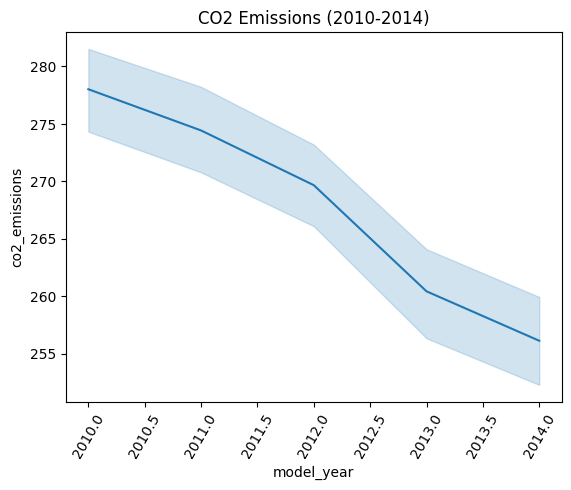

In [28]:
plt.title('CO2 Emissions (2010-2014)')
plt.xticks(rotation=60)
sns.lineplot(data=df, x='model_year', y='co2_emissions')

### CLASSIFICATION

In [29]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, classification_report,
 confusion_matrix, ConfusionMatrixDisplay, roc_auc_score)

###### Using Cylinders to Classify the Dataset

<AxesSubplot: xlabel='cylinders', ylabel='count'>

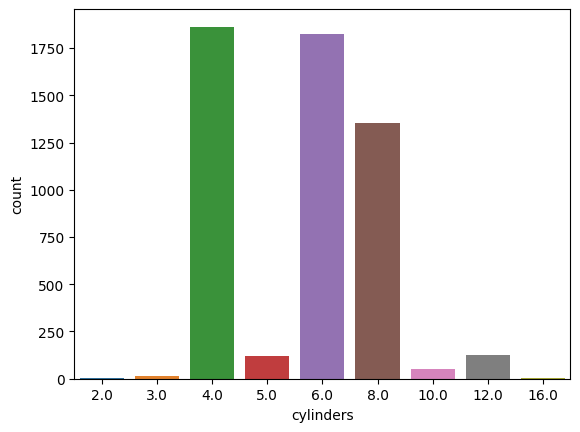

In [30]:
sns.countplot(data=new_numeric_df, x='cylinders')

In [31]:
X = new_numeric_df.drop('cylinders', axis=1)
y = new_numeric_df['cylinders']

In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=21, k_neighbors = 2) 
X_sm, y_sm = sm.fit_resample(X, y) 
X, y = X_sm, y_sm

<AxesSubplot: xlabel='cylinders', ylabel='count'>

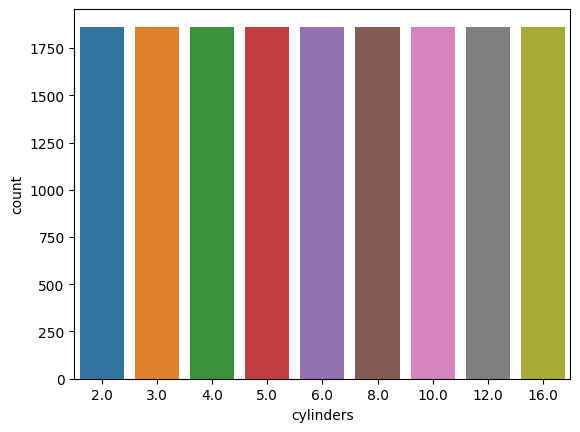

In [33]:
new_df = pd.concat([X_sm,y_sm], axis = 1)
sns.countplot(x='cylinders',data=new_df)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21) 
X,y=X_train,y_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=21)

In [35]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

Decision Tree
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00       316
         3.0       1.00      1.00      1.00       310
         4.0       0.99      0.99      0.99       301
         5.0       0.98      0.99      0.99       303
         6.0       0.99      0.99      0.99       315
         8.0       0.99      0.99      0.99       304
        10.0       1.00      1.00      1.00       292
        12.0       1.00      0.99      0.99       275
        16.0       1.00      1.00      1.00       267

    accuracy                           0.99      2683
   macro avg       0.99      0.99      0.99      2683
weighted avg       0.99      0.99      0.99      2683



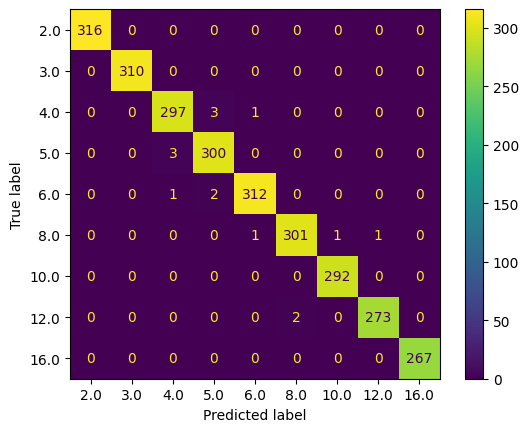

Support Vector
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00       316
         3.0       0.98      1.00      0.99       310
         4.0       0.96      0.74      0.84       301
         5.0       0.66      0.90      0.77       303
         6.0       0.89      0.76      0.82       315
         8.0       0.96      0.86      0.91       304
        10.0       0.90      0.95      0.92       292
        12.0       0.91      0.96      0.93       275
        16.0       1.00      1.00      1.00       267

    accuracy                           0.91      2683
   macro avg       0.92      0.91      0.91      2683
weighted avg       0.92      0.91      0.91      2683



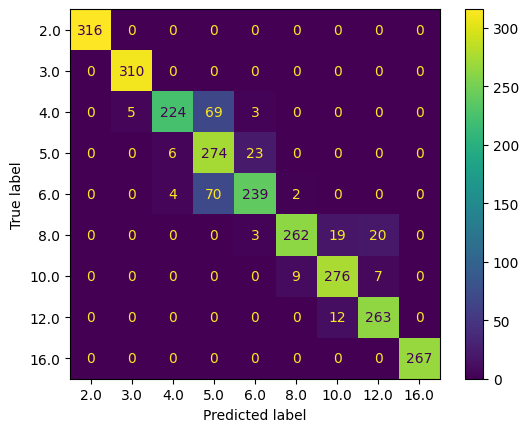

Random Forest
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00       316
         3.0       1.00      1.00      1.00       310
         4.0       1.00      0.98      0.99       301
         5.0       0.98      1.00      0.99       303
         6.0       0.99      0.99      0.99       315
         8.0       0.99      1.00      1.00       304
        10.0       1.00      1.00      1.00       292
        12.0       1.00      0.99      1.00       275
        16.0       1.00      1.00      1.00       267

    accuracy                           1.00      2683
   macro avg       1.00      1.00      1.00      2683
weighted avg       1.00      1.00      1.00      2683



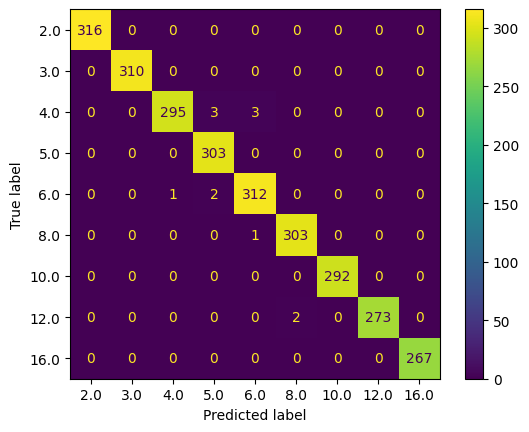

Logistic Regression
              precision    recall  f1-score   support

         2.0       0.97      1.00      0.98       316
         3.0       0.92      1.00      0.96       310
         4.0       0.69      0.71      0.70       301
         5.0       0.61      0.62      0.61       303
         6.0       0.80      0.71      0.75       315
         8.0       0.96      0.74      0.84       304
        10.0       0.73      0.82      0.77       292
        12.0       0.79      0.84      0.81       275
        16.0       0.98      1.00      0.99       267

    accuracy                           0.82      2683
   macro avg       0.83      0.83      0.82      2683
weighted avg       0.83      0.82      0.82      2683



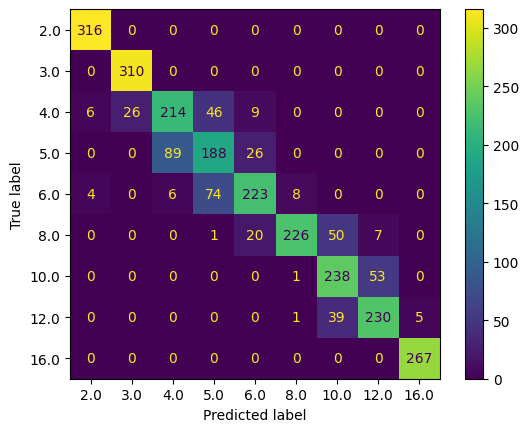

K Neighbors
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00       316
         3.0       1.00      1.00      1.00       310
         4.0       0.97      0.89      0.93       301
         5.0       0.89      1.00      0.94       303
         6.0       0.96      0.92      0.94       315
         8.0       0.99      0.93      0.96       304
        10.0       0.96      1.00      0.98       292
        12.0       0.98      1.00      0.99       275
        16.0       1.00      1.00      1.00       267

    accuracy                           0.97      2683
   macro avg       0.97      0.97      0.97      2683
weighted avg       0.97      0.97      0.97      2683



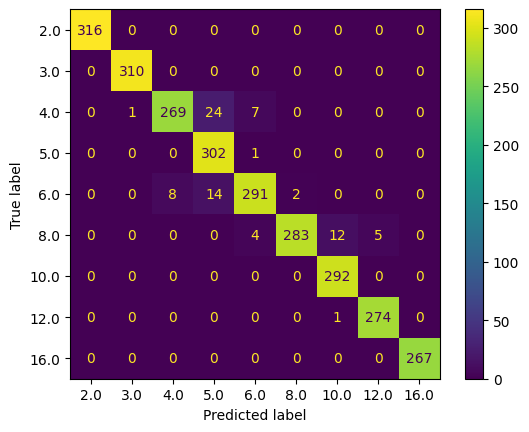

In [36]:
models = [('Decision Tree', DecisionTreeClassifier()), ('Support Vector', SVC()),
         ('Random Forest', RandomForestClassifier()),('Logistic Regression', LogisticRegression()), 
          ('K Neighbors', KNeighborsClassifier())]
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    print(name)
    print(classification_report(y_val,y_pred))
    ConfusionMatrixDisplay.from_estimator(model, X_val_scaled, y_val)
    plt.show()

###### Using Cross Validation to ensure there was no overfitting

In [37]:
from sklearn.model_selection import cross_val_score, KFold

for name, model in models:
    kfold = KFold(n_splits = 7)
    cross_val = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    print(f'{name}: {cross_val.mean():.2f} mean accuracy, {cross_val.std():.2f} standard deviation')   

Decision Tree: 0.99 mean accuracy, 0.00 standard deviation
Support Vector: 0.53 mean accuracy, 0.02 standard deviation
Random Forest: 1.00 mean accuracy, 0.00 standard deviation
Logistic Regression: 0.62 mean accuracy, 0.01 standard deviation
K Neighbors: 0.95 mean accuracy, 0.00 standard deviation


###### Using Fuel Type to Classify the Dataset

<AxesSubplot: xlabel='fuel_type', ylabel='count'>

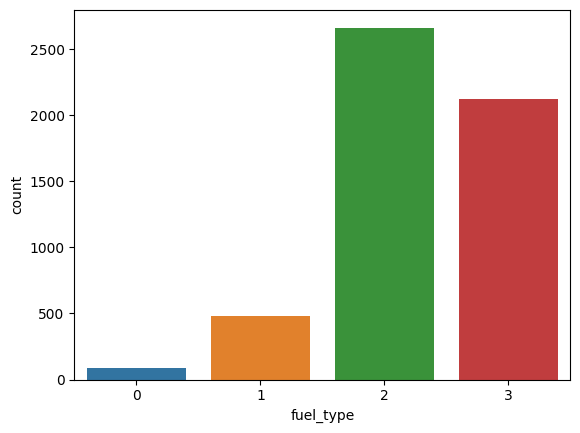

In [38]:
sns.countplot(data=new_numeric_df, x='fuel_type')

In [39]:
X = new_numeric_df.drop('fuel_type', axis=1)
y = new_numeric_df['fuel_type']

In [40]:

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=21, k_neighbors = 2) 
X_sm, y_sm = sm.fit_resample(X, y) 
X, y = X_sm, y_sm

<AxesSubplot: xlabel='fuel_type', ylabel='count'>

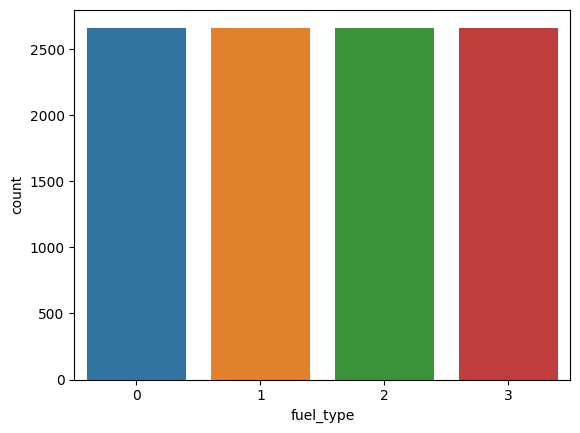

In [41]:
new_df = pd.concat([X_sm,y_sm], axis = 1)
sns.countplot(x='fuel_type',data=new_df)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X,y=X_train,y_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       418
           1       1.00      1.00      1.00       429
           2       0.90      0.91      0.90       424
           3       0.91      0.90      0.90       434

    accuracy                           0.95      1705
   macro avg       0.95      0.95      0.95      1705
weighted avg       0.95      0.95      0.95      1705



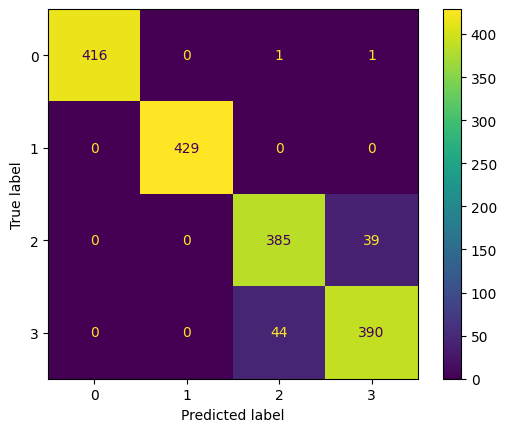

Support Vector
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       418
           1       1.00      1.00      1.00       429
           2       0.68      0.71      0.69       424
           3       0.70      0.67      0.68       434

    accuracy                           0.84      1705
   macro avg       0.85      0.85      0.84      1705
weighted avg       0.84      0.84      0.84      1705



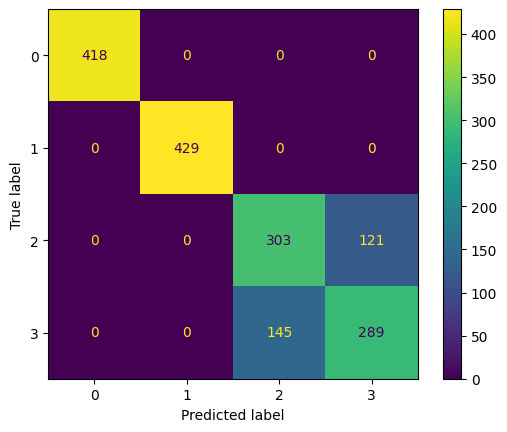

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       418
           1       1.00      1.00      1.00       429
           2       0.94      0.92      0.93       424
           3       0.92      0.94      0.93       434

    accuracy                           0.96      1705
   macro avg       0.96      0.96      0.96      1705
weighted avg       0.96      0.96      0.96      1705



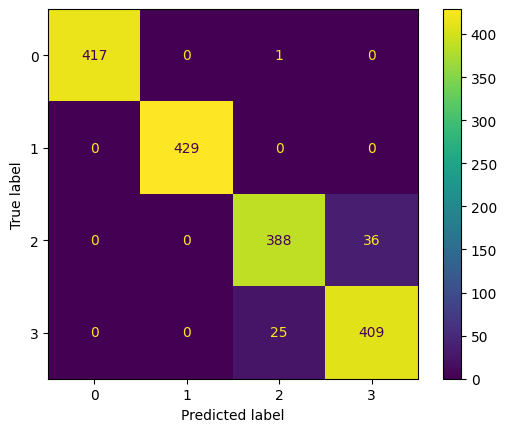

Logistic Regression
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       418
           1       1.00      1.00      1.00       429
           2       0.63      0.61      0.62       424
           3       0.67      0.66      0.66       434

    accuracy                           0.81      1705
   macro avg       0.81      0.81      0.81      1705
weighted avg       0.81      0.81      0.81      1705



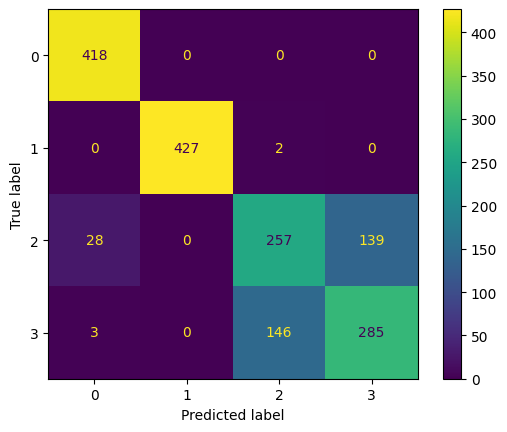

K Neighbors
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       418
           1       1.00      1.00      1.00       429
           2       0.86      0.79      0.82       424
           3       0.81      0.87      0.84       434

    accuracy                           0.92      1705
   macro avg       0.92      0.92      0.92      1705
weighted avg       0.92      0.92      0.92      1705



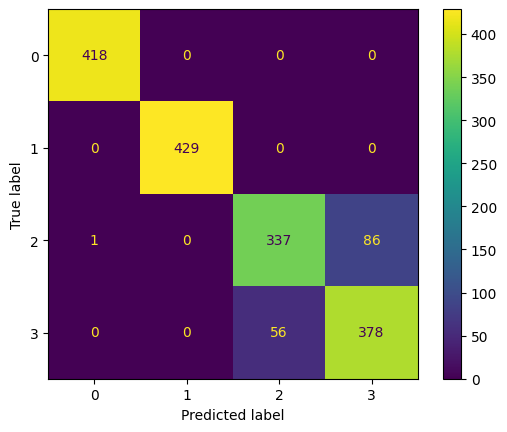

In [44]:
models = [('Decision Tree', DecisionTreeClassifier()), ('Support Vector', SVC()),
         ('Random Forest', RandomForestClassifier()),('Logistic Regression', LogisticRegression()), 
          ('K Neighbors', KNeighborsClassifier())]
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    print(name)
    print(classification_report(y_val,y_pred))
    ConfusionMatrixDisplay.from_estimator(model, X_val_scaled, y_val)
    plt.show()

**Cross Validation**

In [45]:
from sklearn.model_selection import cross_val_score, KFold

for name, model in models:
    kfold = KFold(n_splits = 5)
    cross_val = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    print(f'{name}: {cross_val.mean():.2f} mean accuracy, {cross_val.std():.2f} standard deviation') 

Decision Tree: 0.95 mean accuracy, 0.01 standard deviation
Support Vector: 0.37 mean accuracy, 0.03 standard deviation
Random Forest: 0.96 mean accuracy, 0.00 standard deviation
Logistic Regression: 0.77 mean accuracy, 0.01 standard deviation
K Neighbors: 0.88 mean accuracy, 0.01 standard deviation


###### Using Model Year to Classify the Dataset

<AxesSubplot: xlabel='model_year', ylabel='count'>

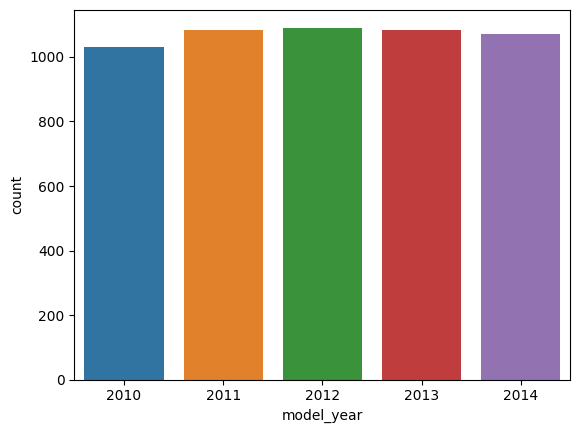

In [46]:
sns.countplot(data=new_numeric_df, x='model_year')

In [47]:
X = new_numeric_df.drop('model_year', axis=1)
y = new_numeric_df['model_year']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X,y=X_train,y_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

Decision Tree
              precision    recall  f1-score   support

        2010       0.36      0.44      0.40       172
        2011       0.23      0.26      0.24       178
        2012       0.22      0.21      0.22       178
        2013       0.21      0.16      0.18       176
        2014       0.41      0.35      0.38       154

    accuracy                           0.28       858
   macro avg       0.28      0.28      0.28       858
weighted avg       0.28      0.28      0.28       858



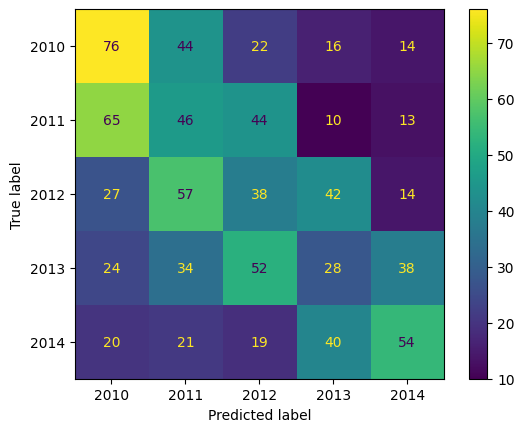

Support Vector
              precision    recall  f1-score   support

        2010       0.28      0.36      0.32       172
        2011       0.23      0.29      0.26       178
        2012       0.21      0.13      0.16       178
        2013       0.24      0.14      0.17       176
        2014       0.24      0.32      0.28       154

    accuracy                           0.25       858
   macro avg       0.24      0.25      0.24       858
weighted avg       0.24      0.25      0.24       858



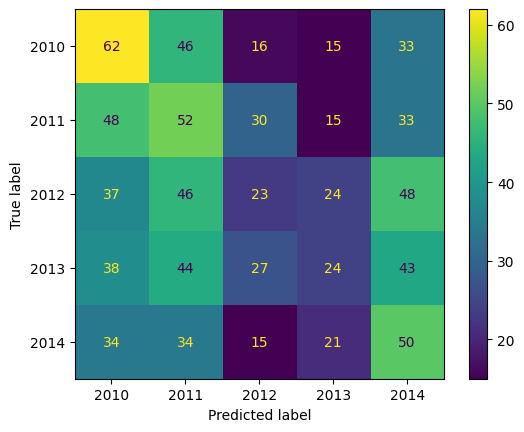

Random Forest
              precision    recall  f1-score   support

        2010       0.45      0.47      0.46       172
        2011       0.21      0.20      0.20       178
        2012       0.21      0.24      0.22       178
        2013       0.20      0.18      0.19       176
        2014       0.38      0.37      0.37       154

    accuracy                           0.29       858
   macro avg       0.29      0.29      0.29       858
weighted avg       0.29      0.29      0.29       858



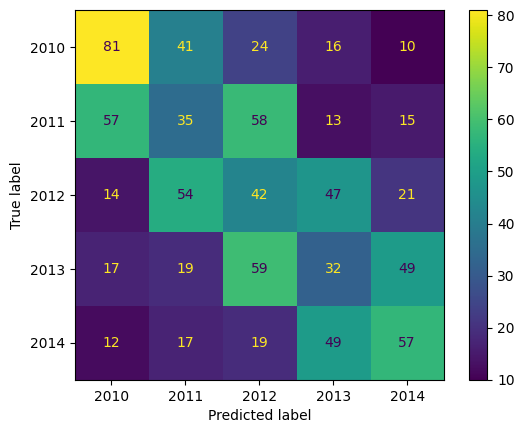

Logistic Regression
              precision    recall  f1-score   support

        2010       0.31      0.22      0.25       172
        2011       0.26      0.33      0.29       178
        2012       0.25      0.15      0.19       178
        2013       0.24      0.12      0.16       176
        2014       0.20      0.42      0.27       154

    accuracy                           0.24       858
   macro avg       0.25      0.25      0.23       858
weighted avg       0.25      0.24      0.23       858



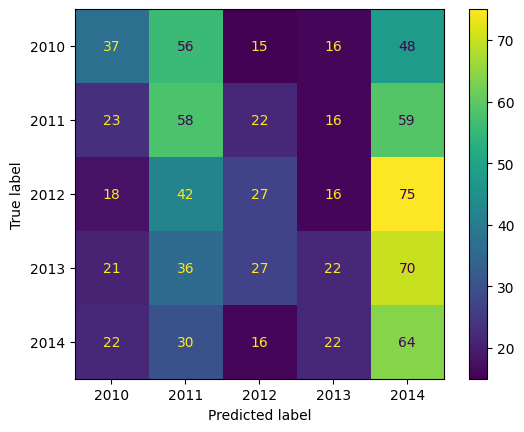

K Neighbors
              precision    recall  f1-score   support

        2010       0.32      0.45      0.38       172
        2011       0.19      0.21      0.20       178
        2012       0.18      0.17      0.17       178
        2013       0.17      0.10      0.13       176
        2014       0.26      0.25      0.26       154

    accuracy                           0.23       858
   macro avg       0.22      0.24      0.23       858
weighted avg       0.22      0.23      0.22       858



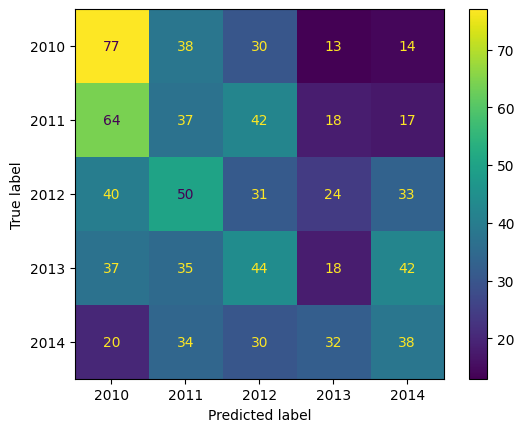

In [50]:
models = [('Decision Tree', DecisionTreeClassifier()), ('Support Vector', SVC()),
         ('Random Forest', RandomForestClassifier()),('Logistic Regression', LogisticRegression()), 
          ('K Neighbors', KNeighborsClassifier())]
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    cross_val = cross_val_score(model, X, y, cv=5)
    print(name)
    print(classification_report(y_val,y_pred))
    ConfusionMatrixDisplay.from_estimator(model, X_val_scaled, y_val)
    plt.show()

###### Testing the Classification Model 

              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00       363
         3.0       1.00      1.00      1.00       379
         4.0       1.00      0.98      0.99       393
         5.0       0.99      1.00      0.99       350
         6.0       0.98      1.00      0.99       335
         8.0       1.00      0.99      0.99       389
        10.0       0.99      1.00      1.00       385
        12.0       1.00      1.00      1.00       400
        16.0       1.00      1.00      1.00       360

    accuracy                           1.00      3354
   macro avg       1.00      1.00      1.00      3354
weighted avg       1.00      1.00      1.00      3354



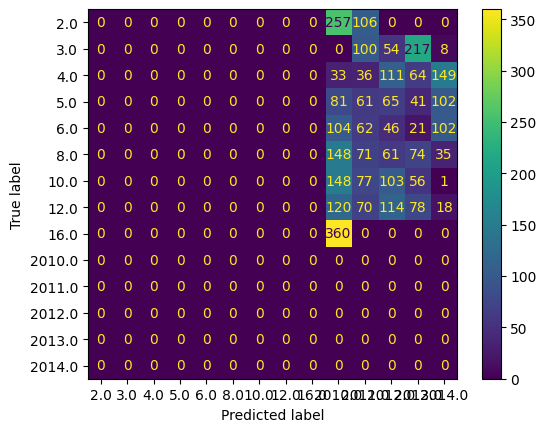

In [51]:
X = new_numeric_df.drop('cylinders', axis=1)
y = new_numeric_df['cylinders']

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report,
 confusion_matrix, ConfusionMatrixDisplay,roc_auc_score)

# SMOTE
sm = SMOTE(random_state=21, k_neighbors = 2) 
X_sm, y_sm = sm.fit_resample(X, y) 
X, y = X_sm, y_sm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21) 
X,y=X_train,y_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=21)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
plt.show()

### CLUSTERING

**Preparing the Data**

In [52]:
 
Xfeatures = numeric[['engine_size', 'fuel_consumption_city', 'fuel_consumption_comb',
       'fuel_consumption_hwy', 'fuel_consumption_comb_mpg','co2_emissions']]

In [53]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(Xfeatures)

In [54]:
from sklearn.cluster import KMeans

In [55]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
kmodel = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmodel.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
dbs = davies_bouldin_score(X, cluster_labels)

print('Silhouette score =', silhouette_avg)
print('Davies Bouldin score =', dbs)

Silhouette score = 0.40100407261457865
Davies Bouldin score = 0.8120231744012342


#### Hierarchical Clustering

In [56]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=6, linkage='single')
cluster_labels = model.fit_predict(X)

In [57]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

score = silhouette_score(X, cluster_labels)

dbs = davies_bouldin_score(X, cluster_labels)

print('Silhouette score =', score)
print('Davies Bouldin score =', dbs)

Silhouette score = 0.2989602652058824
Davies Bouldin score = 0.3643155786458104


In [58]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import ClusterNode


In [59]:
matrix_linkage = hierarchy.linkage(model.children_) # hierarchy is used to obtain the children
matrix_linkage # distances between the points 

array([[0.00000000e+00, 3.95000000e+02, 1.41421356e+00, 2.00000000e+00],
       [1.76000000e+03, 2.38400000e+03, 1.41421356e+00, 2.00000000e+00],
       [1.28900000e+03, 1.47300000e+03, 1.41421356e+00, 2.00000000e+00],
       ...,
       [1.07010000e+04, 1.07100000e+04, 7.35511387e+02, 5.34900000e+03],
       [1.07110000e+04, 1.07120000e+04, 7.50746961e+02, 5.35500000e+03],
       [1.06930000e+04, 1.07130000e+04, 7.79483162e+02, 5.35800000e+03]])

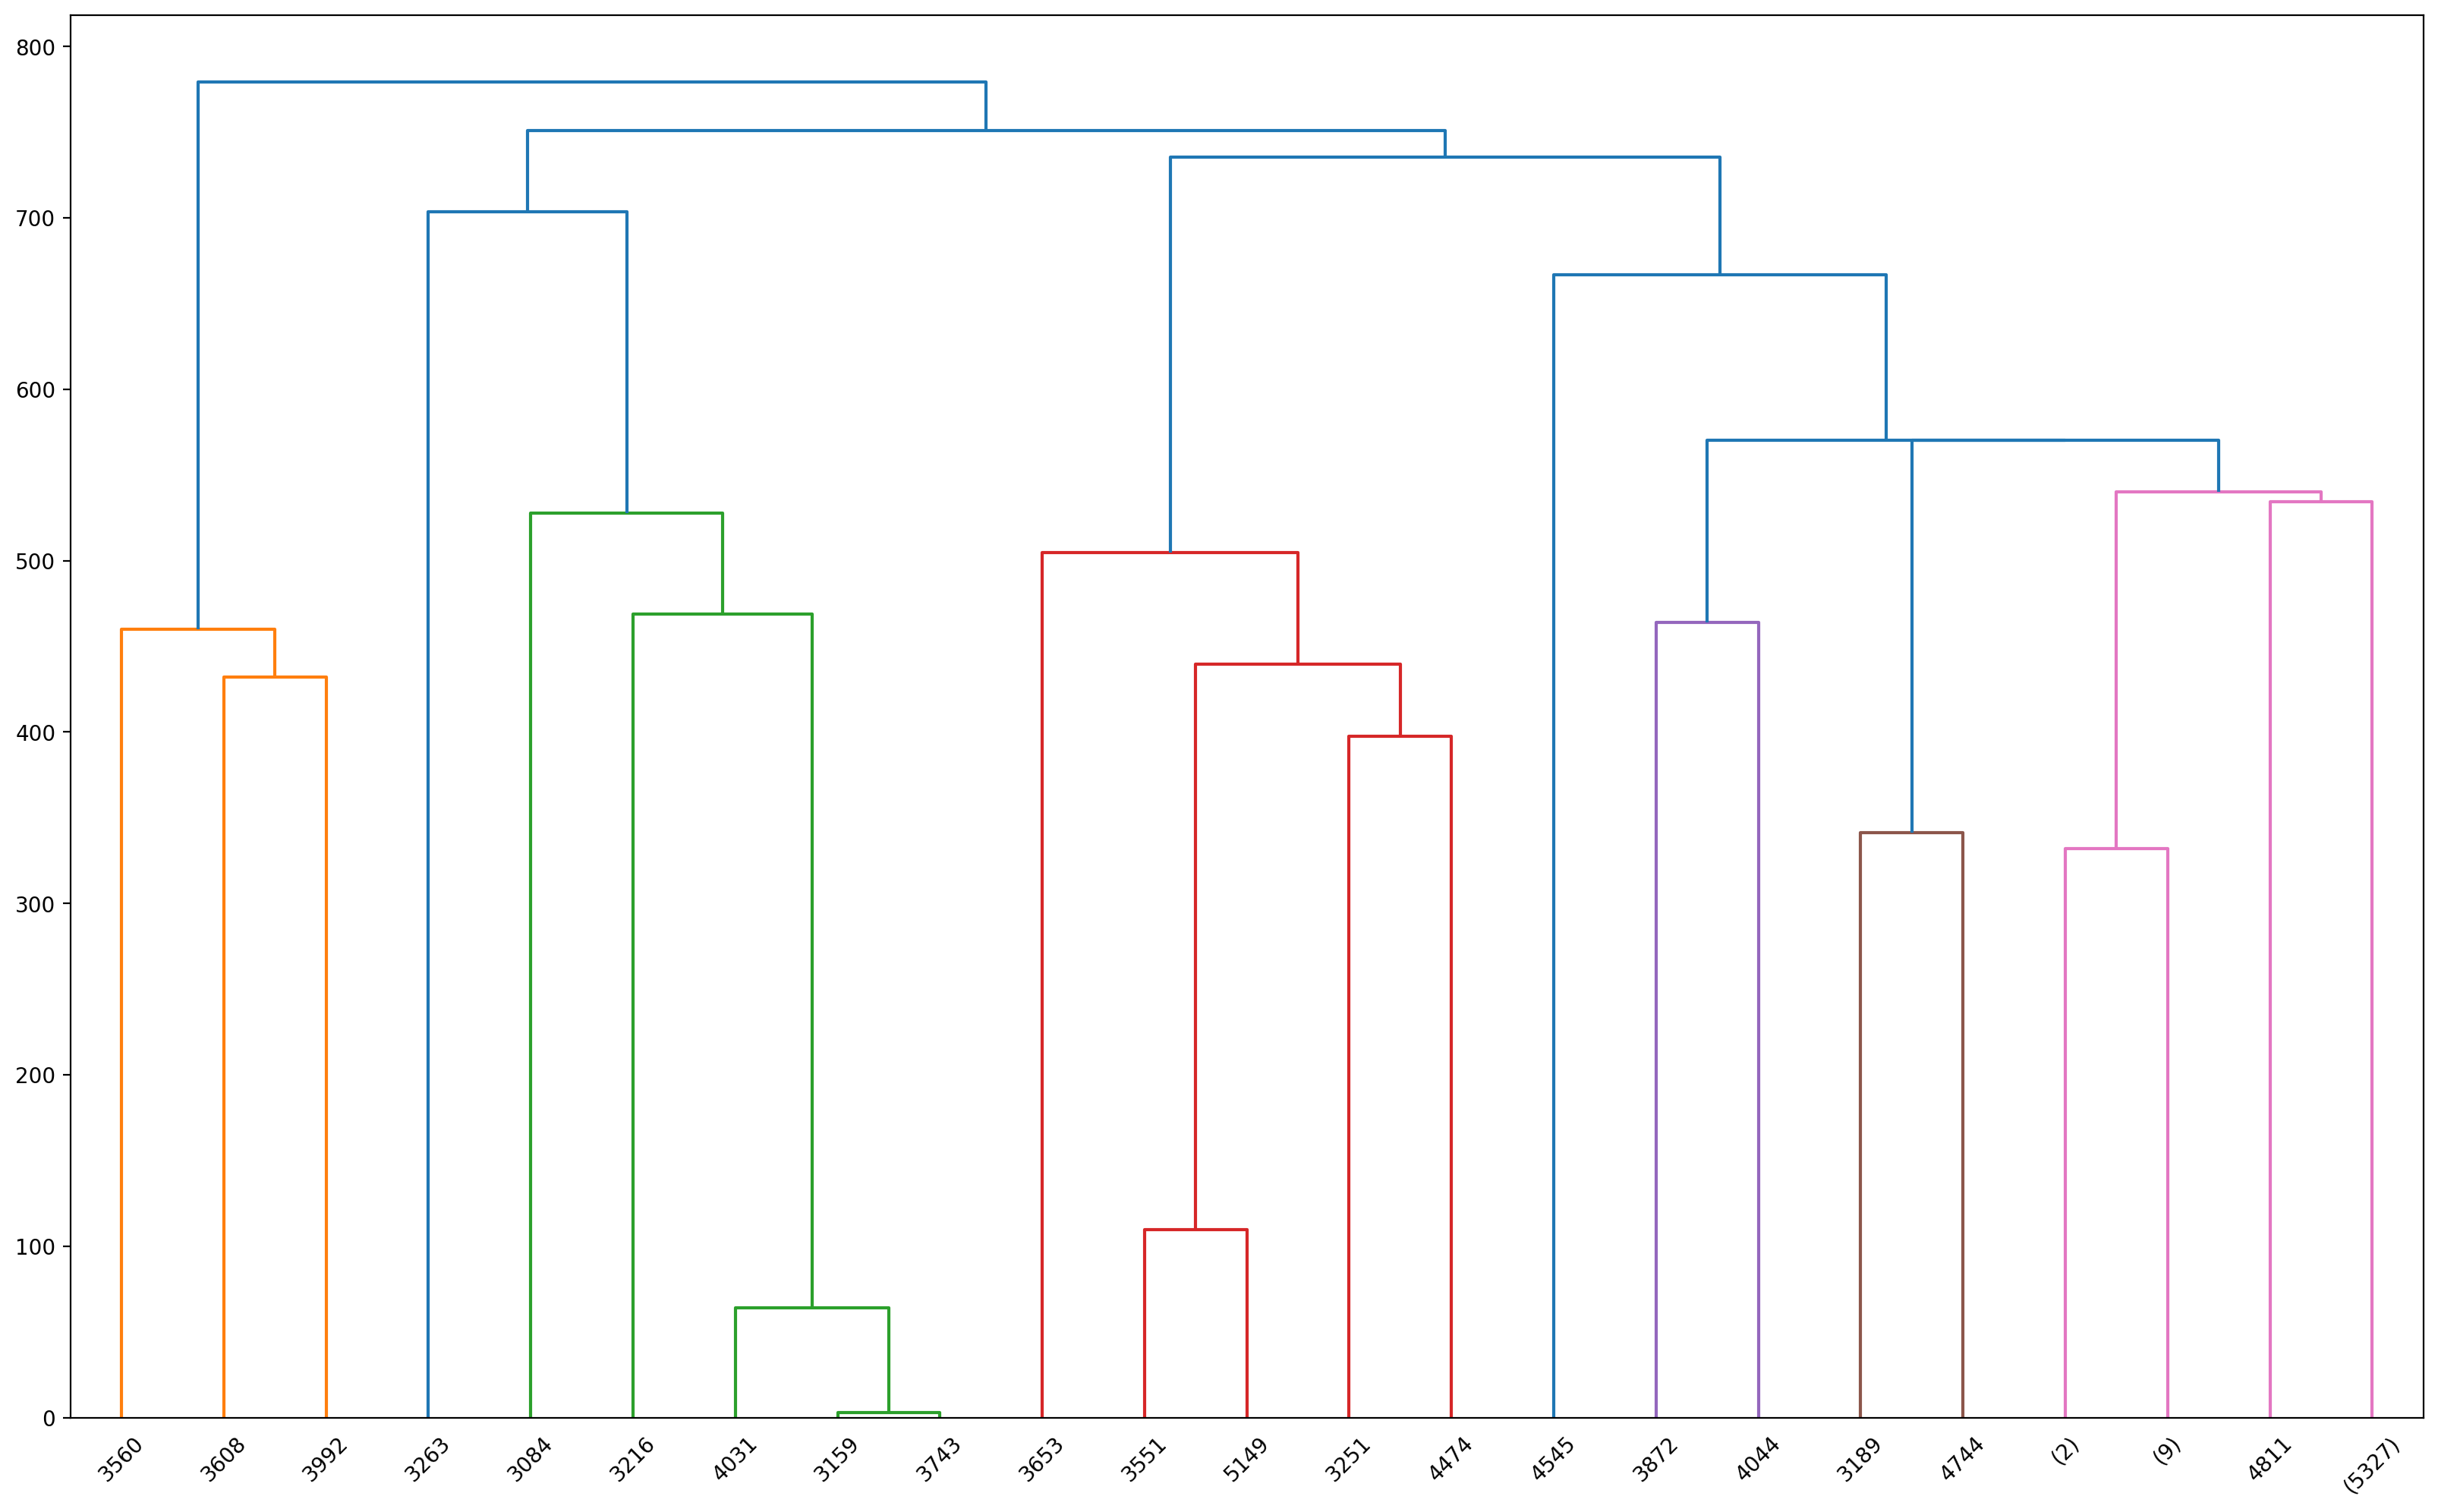

In [60]:
plt.figure(figsize=(20,12), dpi = 200,)
dendrogram(Z=matrix_linkage,truncate_mode= 'level', p= 7);